In [2]:
#Dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#import nasdaqdatalink as ndl
from scipy.stats import linregress

In [77]:
t_mobile = pd.read_csv('resources/WIKI-TMUS copy.csv', delimiter=',')
att = pd.read_csv('resources/WIKI-T copy.csv', delimiter=',')
verizon = pd.read_csv('resources/WIKI-VZ copy.csv', delimiter=',')
# Add 'level_0' column to each dataframe
t_mobile['level_0'] = 'T-Mobile'
att['level_0'] = 'AT&T'
verizon['level_0'] = 'Verizon'
# Merge the three dataframes together
combined_df = pd.concat([att, t_mobile, verizon], keys=['AT&T', 'T-Mobile', 'Verizon'])

combined_df

Date   Open     High    Low  Close      Volume  \
AT&T    0     2018-03-27  34.85  35.2000  34.69  34.90  33198184.0   
        1     2018-03-26  35.06  35.2866  34.44  34.69  31281785.0   
        2     2018-03-23  35.37  35.9900  34.55  34.70  34260415.0   
        3     2018-03-22  35.95  36.0400  35.36  35.37  28063362.0   
        4     2018-03-21  36.34  36.5000  36.00  36.00  16776049.0   
...                  ...    ...      ...    ...    ...         ...   
Verizon 8653  1983-11-28  68.50  68.5000  66.75  67.00    295975.0   
        8654  1983-11-25  69.62  69.7500  68.87  68.87    221475.0   
        8655  1983-11-23  70.00  70.2500  69.25  69.62    143988.0   
        8656  1983-11-22  70.25  71.2500  69.87  70.00    333338.0   
        8657  1983-11-21  70.62  70.7500  65.62  70.25    627575.0   

              Ex-Dividend  Split Ratio  Adj. Open  Adj. High   Adj. Low  \
AT&T    0             0.0          1.0  34.850000  35.200000  34.690000   
        1             0.0          1.0  35.060000  35.286600  34.440000   
        2             0.0          1.0  35.370000  35.990000  34.550000   
        3             0.0          1.0  35.950000  36.040000  35.360000   
        4             0.0          1.0  36.340000  36.500000  36.000000   
...                   ...          ...        ...        ...        ...   
Verizon 8653          0.0          1.0   1.600310   1.600310   1.559426   
        8654          0.0          1.0   1.626475   1.629512   1.608954   
        8655          0.0          1.0   1.635353   1.641193   1.617831   
        8656          0.0          1.0   1.641193   1.664556   1.632316   
        8657          0.0          1.0   1.649837   1.652874   1.533026   

              Adj. Close  Adj. Volume  level_0  
AT&T    0      34.900000   33198184.0     AT&T  
        1      34.690000   31281785.0     AT&T  
        2      34.700000   34260415.0     AT&T  
        3      35.370000   28063362.0     AT&T  
        4      36.000000   16776049.0     AT&T  
...                  ...          ...      ...  
Verizon 8653    1.565266    2367800.0  Verizon  
        8654    1.608954    1771800.0  Verizon  
        8655    1.626475    1151904.0  Verizon  
        8656    1.635353    2666704.0  Verizon  
        8657    1.641193    5020600.0  Verizon  

[19904 rows x 14 columns]

In [78]:
combined_df.to_csv('combined_data.csv', index=False)

In [71]:
# Calculate the daily percentage change in stock prices
combined_df['daily_pct_change'] = combined_df.groupby(level=0)['Close'].pct_change()
# Print the daily percentage change for each company
print(combined_df[['daily_pct_change']])
combined_df

      daily_pct_change
2017               NaN
2018               NaN


,index,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,level_0,daily_pct_change
2017,2017,2010-03-22,26.19,26.54,26.08,26.40,24538400.0,0.0,1.0,17.274228,17.505078,17.201675,17.412738,24538400.0,AT&T,NaN
2018,2018,2010-03-19,26.19,26.31,25.99,26.24,35866700.0,0.0,1.0,17.274228,17.353377,17.142313,17.307206,35866700.0,AT&T,NaN


In [39]:

# Calculate daily percentage change
combined_df['daily_pct_change'] = combined_df.groupby('level_0')['Close'].pct_change()

# Filter data to only include 2017 and 2018
combined_df = combined_df.loc['2017-01-01':'2018-12-31']





In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Read in data from csv files
t_mobile = pd.read_csv('resources/WIKI-TMUS copy.csv', delimiter=',')
att = pd.read_csv('resources/WIKI-T copy.csv', delimiter=',')
verizon = pd.read_csv('resources/WIKI-VZ copy.csv', delimiter=',')

# Add 'level_0' column to each dataframe
t_mobile['level_0'] = 'T-Mobile'
att['level_0'] = 'AT&T'
verizon['level_0'] = 'Verizon'

# Merge the three dataframes together
combined_df = pd.concat([att, t_mobile, verizon])

# Calculate daily percentage change
combined_df['daily_pct_change'] = combined_df.groupby('level_0')['Close'].pct_change()

# Filter data to only include 2017 and 2018
combined_df = combined_df.reset_index()
combined_df = combined_df.loc['2016-12-30':'2018-03-27']



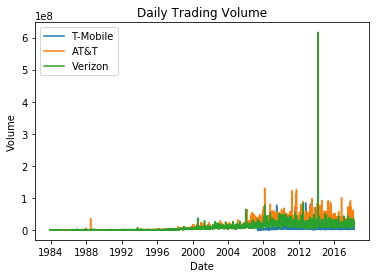

In [74]:
# Load the data from CSV files
t_mobile = pd.read_csv('resources/WIKI-TMUS copy.csv', delimiter=',')
att = pd.read_csv('resources/WIKI-T copy.csv', delimiter=',')
verizon = pd.read_csv('resources/WIKI-VZ copy.csv', delimiter=',')

# Convert the date column to datetime object
t_mobile['Date'] = pd.to_datetime(t_mobile['Date'])
att['Date'] = pd.to_datetime(att['Date'])
verizon['Date'] = pd.to_datetime(verizon['Date'])

# Calculate the daily trading volume
t_mobile_volume = t_mobile[['Date', 'Volume']]
t_mobile_volume = t_mobile_volume.groupby('Date').sum()

att_volume = att[['Date', 'Volume']]
att_volume = att_volume.groupby('Date').sum()

verizon_volume = verizon[['Date', 'Volume']]
verizon_volume = verizon_volume.groupby('Date').sum()

# Create line charts
plt.plot(t_mobile_volume.index, t_mobile_volume['Volume'], label='T-Mobile')
plt.plot(att_volume.index, att_volume['Volume'], label='AT&T')
plt.plot(verizon_volume.index, verizon_volume['Volume'], label='Verizon')

# Set the plot title and axis labels
plt.title('Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')

# Add legend
plt.legend()

# Display the plot
plt.show()

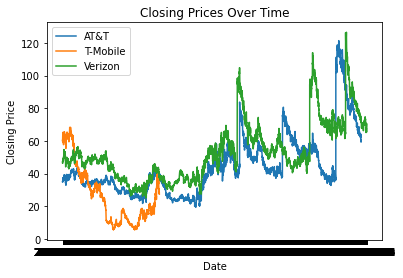

In [6]:
plt.plot(att['Date'], att['Close'], label="AT&T")
plt.plot(t_mobile['Date'], t_mobile['Close'], label="T-Mobile")
plt.plot(verizon['Date'], verizon['Close'], label="Verizon")
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(loc="best")
plt.show()